<a href="https://colab.research.google.com/github/sanskruti0ise/stock_price_predict/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction Using Multiple Models**

In this notebook, we will predict stock prices using several machine learning models: Linear Regression, LSTM, ARIMA. We will compare their performance to select the best model.

## 1. Setup

**1.1 Install Required Libraries**

In [1]:
!pip install yfinance
!pip install tensorflow
!pip install scikit-learn

**1.2 Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## 2. Data Collection

**2.1 Download Historical Stock Data**

In [3]:
# Download historical data for Apple stock
stock_data = yf.download('AAPL', start='2010-01-01', end='2024-07-06')

# Display the first few rows
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461978,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [17]:
import pandas as pd
# Preprocess data
dataset_ex_df = stock_data.copy()
dataset_ex_df = dataset_ex_df.reset_index()
dataset_ex_df['Date'] = pd.to_datetime(dataset_ex_df['Date'])
dataset_ex_df.set_index('Date', inplace=True)
dataset_ex_df = dataset_ex_df['Close'].to_frame()

## 3. Data Preprocessing

**3.1 Prepare Data**

In [4]:
# Use 'Close' price for prediction
data = stock_data[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the look-back period
look_back = 60

def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape X to be [samples, time steps, features] for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## 4. Model Building and Training

**4.1 Linear Regression**

In [5]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
lr_pred = lr_model.predict(X_test)
lr_pred = scaler.inverse_transform(lr_pred.reshape(-1, 1))


**4.2 LSTM Model**

In [6]:
# Build and compile LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=25))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=1, verbose=1)

# Predict on test data
lstm_pred = lstm_model.predict(X_test_lstm)
lstm_pred = scaler.inverse_transform(lstm_pred)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 0.0013
Epoch 2/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 2.5306e-04
Epoch 3/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.8925e-04
Epoch 4/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.4283e-04
Epoch 5/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.1907e-04
Epoch 6/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 8.9880e-05
Epoch 7/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - loss: 1.1351e-04
Epoch 8/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 8.1899e-05
Epoch 9/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 8.2067e-05
Epoch 10/10
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 9.9582e-05
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [7]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.3 MB/s eta 0:00:00


**4.3 ARIMA**

In [18]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(dataset_ex_df['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13540.257, Time=4.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13535.558, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13535.998, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13535.933, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13539.042, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13538.847, Time=1.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 6.053 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3650
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6765.779
Date:                Sat, 10 Aug 2024   AIC                          13535.558
Time:                        09:05:28   BIC                          13547.962
Sample:                             0   HQIC                         13539.975
    

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = dataset_ex_df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

In [26]:
arima_predictions = np.array(predictions)

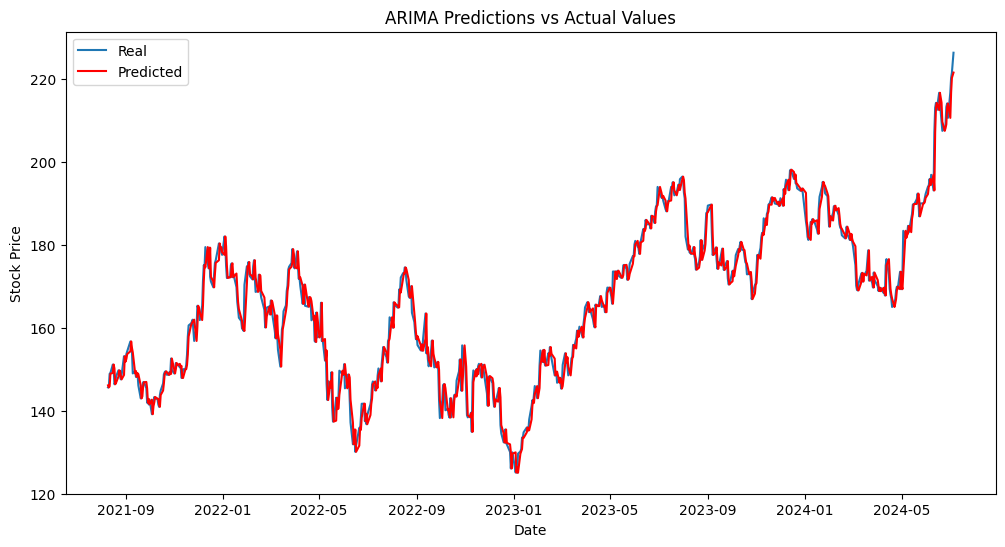

In [20]:
'''import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dataset_ex_df.iloc[size:,:].index, test, label='Real')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()'''

## 5. Model Evaluation

**5.1 Calculate and Compare Performance**

**MSE**

In [27]:
# True values for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_actual_series = pd.Series(y_test_actual.flatten(), index=stock_data.index[-len(y_test_actual):])

# Calculate MSE for each model
def calculate_mse(true_values, predictions):
    return mean_squared_error(true_values, predictions)

# Calculate MSE for each model
lr_mse = calculate_mse(y_test_actual, lr_pred)
lstm_mse = calculate_mse(y_test_actual, lstm_pred)
mse_arima = mean_squared_error(test, arima_predictions)

print(f"Linear Regression MSE: {lr_mse}")
print(f"LSTM MSE: {lstm_mse}")

print(f"ARIMA MSE: {mse_arima}")


Linear Regression MSE: 8.534315587505434
LSTM MSE: 22.574559371979
ARIMA MSE: 7.830129512268827


**MAE: Mean Absoulute Error:**
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average absolute difference between the predicted and actual values.

In [30]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model
mae_lr = mean_absolute_error(y_test_actual, lr_pred)
mae_lstm = mean_absolute_error(y_test_actual, lstm_pred)
mae_arima = mean_absolute_error(test, arima_predictions)

print(f"Linear Regression MAE: {mae_lr}")
print(f"LSTM MAE: {mae_lstm}")
print(f"ARIMA MAE: {mae_arima}")


Linear Regression MAE: 2.218354439919834
LSTM MAE: 3.9227853312797865
ARIMA MAE: 2.0935204701880887


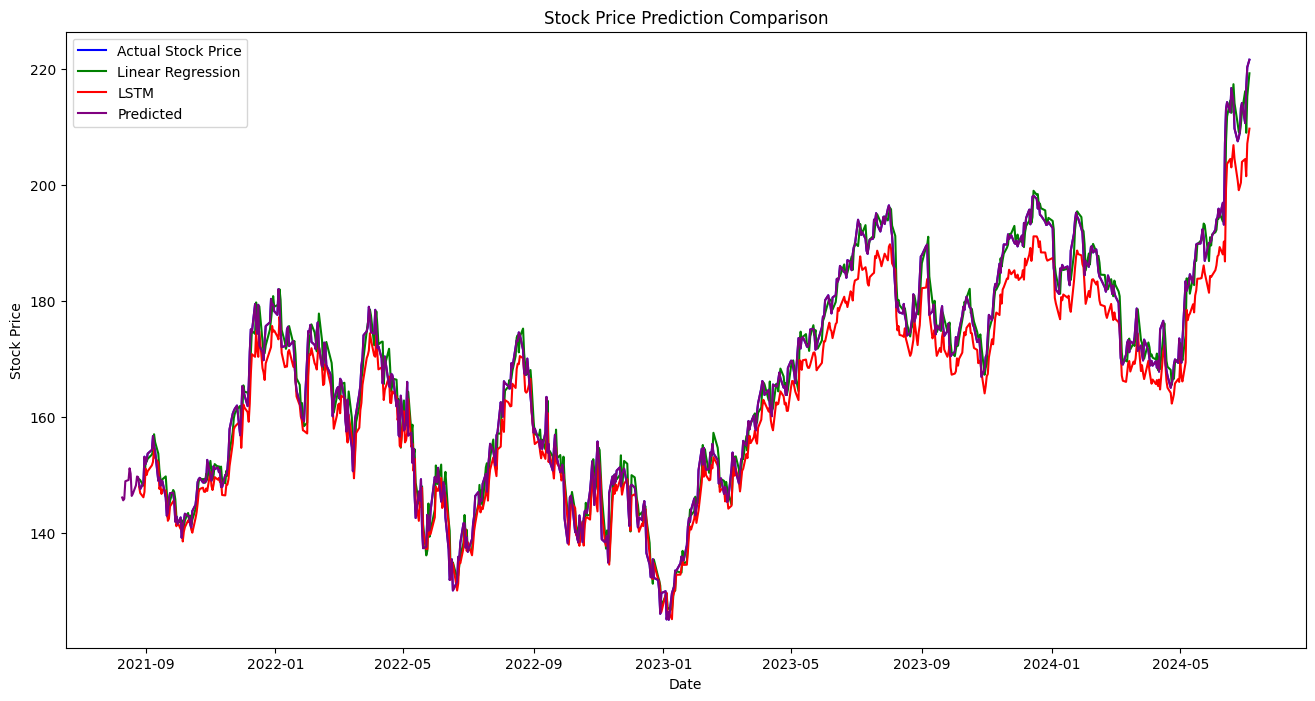

In [32]:
# Plot predictions
plt.figure(figsize=(16,8))
plt.plot(stock_data.index[-len(y_test_actual):], y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(stock_data.index[-len(lr_pred):], lr_pred, color='green', label='Linear Regression')
plt.plot(stock_data.index[-len(lstm_pred):], lstm_pred, color='red', label='LSTM')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='purple', label='Predicted')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

